# Heart Disease Classification

Data ini menetapkan tanggal dari tahun 1988 dan terdiri dari empat database: Cleveland, Hongaria, Swiss, dan Long Beach V. Ini berisi 76 atribut, termasuk atribut yang diprediksi, tetapi semua percobaan yang diterbitkan merujuk pada menggunakan subset dari 14 di antaranya. Bidang "target" mengacu pada adanya penyakit jantung pada pasien. Bilangan bulat bernilai 0 (tidak ada penyakit) dan 1 (penyakit).

Attribute Information:
1. age : umur
2. sex : jenis kelamin
3. cp (chest pain type) : tipe nyeri dada (0-3)
4. trestbps (resting blood pressure) : tekanan darah
5. chol (serum cholesterol) mg/lt : kolesterol serum
6. fbs (fasting blood sugar) > 120 mg/dl : gula darah diukur setelah 8 jam puasa > 120 mg/dl
7. restecg (resting electrocardiographic results) : hasil pemerikasan EKG (elektrokardiografi) (0-2)
8. thalach (maximum heart rate achieved) : denyut jantung maksimum
9. exang (exercise induced angina) : terkena angin duduk (nyeri dada atau rasa tidak nyaman pada dada)
10. oldpeak : Depresi ST disebabkan oleh olahraga relatif terhadap istirahat
11. slope : kemiringan segmen ST
12. ca : nomor pembuluh darah utama : number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

Nama dan nomor jaminan sosial pasien baru-baru ini dihapus dari database, diganti dengan nilai-nilai dummy.

In [2]:
import numpy as np
import pandas as pd

In [3]:
labels = ['Normal', 'Tidak normal']
data = pd.read_csv('heart.csv')

In [4]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
884,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
940,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
990,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
588,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0


## Ukuran Data

In [5]:
jumlah_baris, jumlah_kolom = data.shape
print('baris = ', jumlah_baris, ', Kolom = ', jumlah_kolom)

data.info()

baris =  1025 , Kolom =  14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Mengubah tipe data kategori

In [7]:
category_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

data[category_columns] = data[category_columns].astype('category')

In [8]:
jumlah_baris, jumlah_kolom = data.shape
print('baris = ', jumlah_baris, ', Kolom = ', jumlah_kolom)

data.info()

baris =  1025 , Kolom =  14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null category
cp          1025 non-null category
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null category
restecg     1025 non-null category
thalach     1025 non-null int64
exang       1025 non-null category
oldpeak     1025 non-null float64
slope       1025 non-null category
ca          1025 non-null category
thal        1025 non-null category
target      1025 non-null category
dtypes: category(9), float64(1), int64(4)
memory usage: 50.3 KB


In [9]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.0,1025.0,1025.000000,1025.00000,1025.0,1025.0,1025.000000,1025.0,1025.000000,1025.0,1025.0,1025.0,1025.0
unique,NaN,2.0,4.0,NaN,NaN,2.0,3.0,NaN,2.0,NaN,3.0,5.0,4.0,2.0
top,NaN,1.0,0.0,NaN,NaN,0.0,1.0,NaN,0.0,NaN,1.0,0.0,2.0,1.0
freq,NaN,713.0,497.0,NaN,NaN,872.0,513.0,NaN,680.0,NaN,482.0,578.0,544.0,526.0
mean,54.434146,NaN,NaN,131.611707,246.00000,NaN,NaN,149.114146,NaN,1.071512,NaN,NaN,NaN,NaN
std,9.072290,NaN,NaN,17.516718,51.59251,NaN,NaN,23.005724,NaN,1.175053,NaN,NaN,NaN,NaN
min,29.000000,NaN,NaN,94.000000,126.00000,NaN,NaN,71.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,48.000000,NaN,NaN,120.000000,211.00000,NaN,NaN,132.000000,NaN,0.000000,NaN,NaN,NaN,NaN
50%,56.000000,NaN,NaN,130.000000,240.00000,NaN,NaN,152.000000,NaN,0.800000,NaN,NaN,NaN,NaN
75%,61.000000,NaN,NaN,140.000000,275.00000,NaN,NaN,166.000000,NaN,1.800000,NaN,NaN,NaN,NaN


### Mengecek missing value

In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Memilih hanya variable dengan tipe number

In [11]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,age,trestbps,chol,thalach,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9


### Memilih hanya variable dengan tipe kategorik

In [12]:
data_category = data.select_dtypes(include = ['category'])
data_category.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,0,0,1,0,2,2,3,0
1,1,0,1,0,1,0,0,3,0
2,1,0,0,1,1,0,0,3,0
3,1,0,0,1,0,2,1,3,0
4,0,0,1,1,0,1,3,2,0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh'); sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


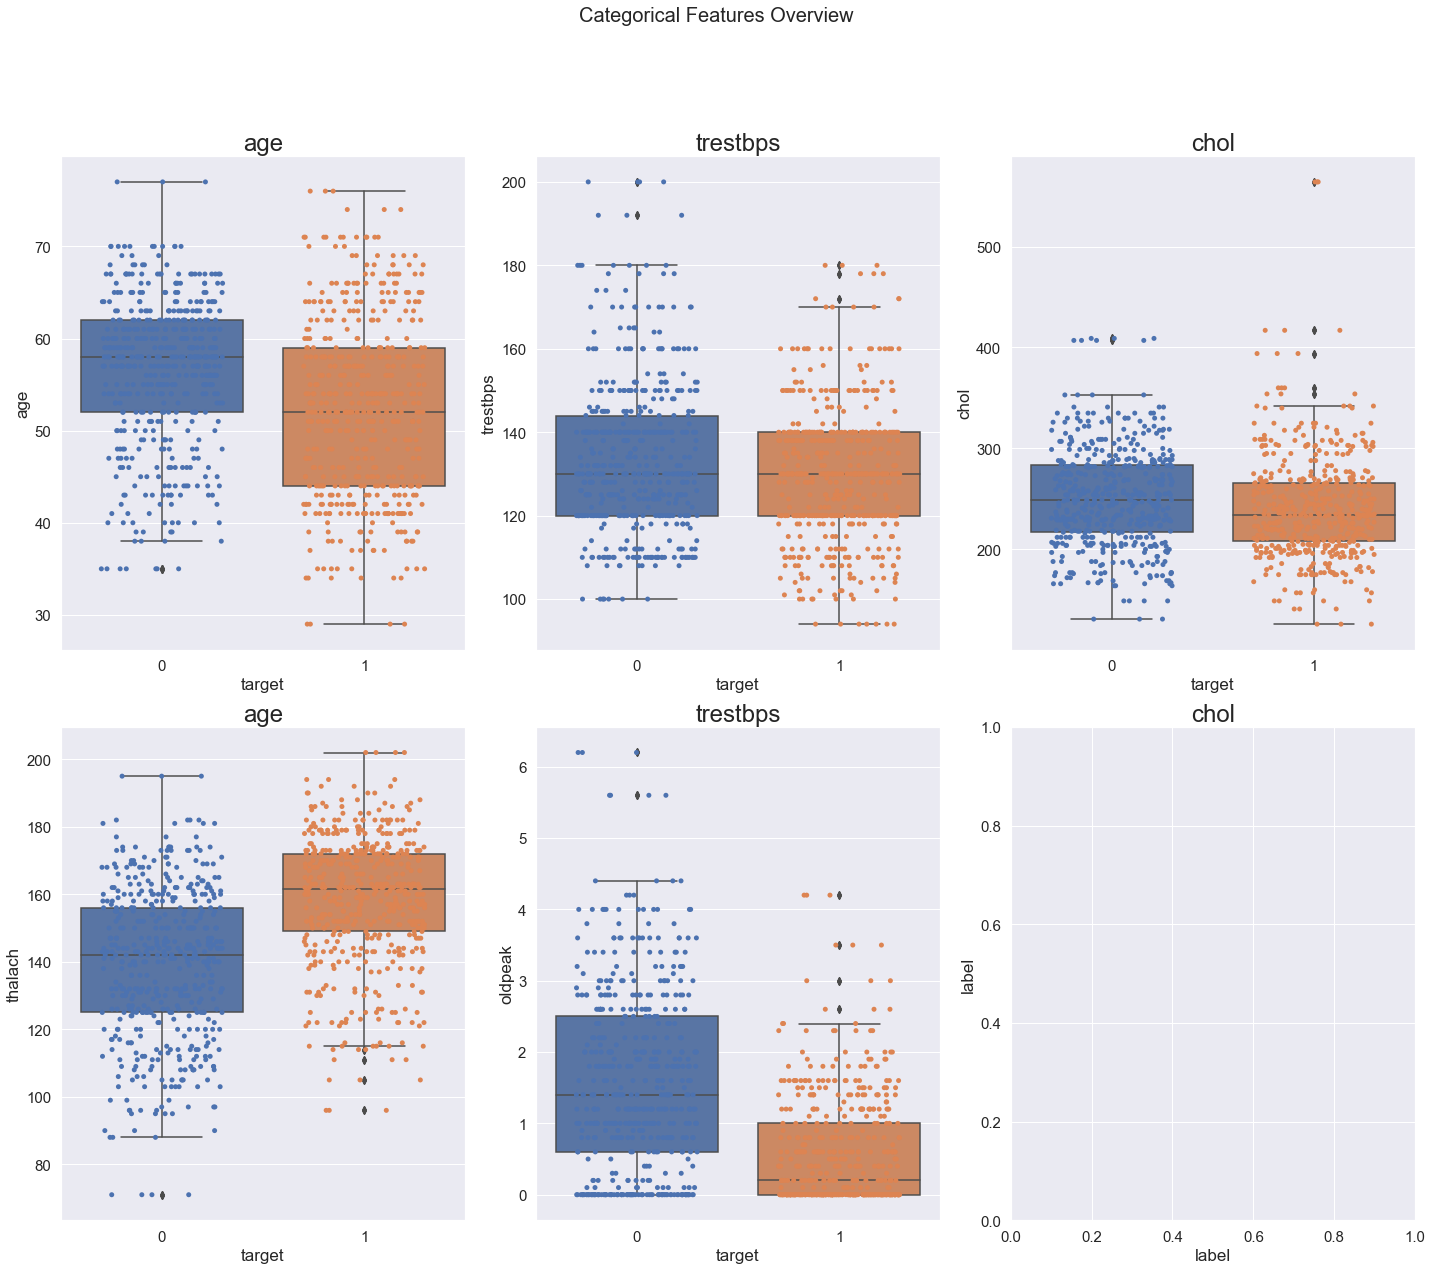

In [16]:
fig, ax = plt.subplots(2,3, figsize=(20,16))

columns = data_num.columns
k = 0
for j in range(len(ax)):
    for i in range(len(ax[j])):
        ax[j][i].tick_params(labelsize=15)
        ax[j][i].set_xlabel('label', fontsize=17, position=(.5,20))
        ax[j][i].set_ylabel('label', fontsize=17)
        try:
            ax[j][i].set_title(columns[i], fontsize=24)
            ax[j][i] = sns.boxplot(x='target', y=columns[k], data=data, ax=ax[j][i])
            ax[j][i] = sns.stripplot(x='target', y=columns[k], jitter=0.3, data=data, ax=ax[j][i])
            k +=1
        except:
            continue
fig.suptitle('Categorical Features Overview', position=(.5,1.1), fontsize=20)
fig.tight_layout()
fig.show()

Terdapat outlier pada beberapa grafik diatas. sementara dibiarkan saja dulu nanti akan dibandingkan model dengan data terdapat outlier dan tidak. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


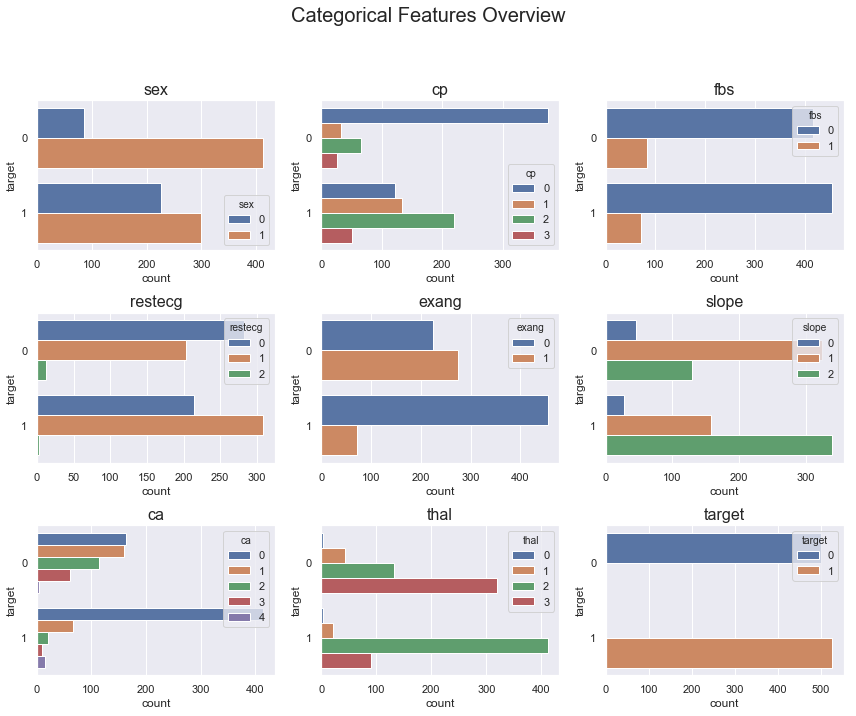

In [19]:
fig, ax = plt.subplots(3,3, figsize=(12,9))
columns = data_category.columns

i = 0
for row in range(len(ax)):
    for col in range(len(ax[row])):        
        try:
            ax[row][col].set_title(columns[i], fontsize=16)
            ax[row][col] = sns.countplot(y='target', hue= columns[i], data=data, ax=ax[row][col])
            i +=1
        except:
            continue

fig.suptitle('Categorical Features Overview', position=(.5,1.1), fontsize=20)
fig.tight_layout()
fig.show()

# Klasifikasi 

In [20]:
import h5py
import cv2
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

warnings.filterwarnings('ignore')

num_trees = 100
test_size = 0.10
seed      = 9
scoring   = "accuracy"
bins      = 8

# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))

In [21]:
# variables to hold the results and names
results = []
names   = []

data_X = data.drop(['target'], axis=1)
data_X = np.asarray(data_X)
labels = np.asarray(data['target'])
data_train, data_test, label_train, label_test = train_test_split(data_X, labels, test_size= test_size, random_state=seed)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(data_train.shape))
print("Test data   : {}".format(data_test.shape))
print("Train labels: {}".format(label_train.shape))
print("Test labels : {}".format(label_test.shape))

[STATUS] splitted train and test data...
Train data  : (922, 13)
Test data   : (103, 13)
Train labels: (922,)
Test labels : (103,)


LR: 0.838324 (0.035763)
LDA: 0.823153 (0.037256)
KNN: 0.735344 (0.028946)
CART: 0.992415 (0.011929)
RF: 0.995664 (0.009955)
NB: 0.819869 (0.039830)
SVM: 0.994589 (0.011104)


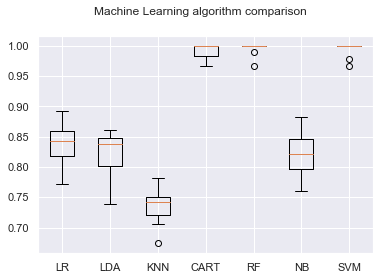

In [22]:
# 10-fold cross validation
cv_results = []
model_results = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_result = cross_val_score(model, data_train, label_train, cv=kfold, scoring=scoring)
    cv_results.append(cv_result)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_result.mean(), cv_result.std())
    print(msg)

    model_results.append((name, model.fit(data_train, label_train)))
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(cv_results)
ax.set_xticklabels(names)
plt.show()

In [23]:
from sklearn import svm, metrics

for name, model in model_results:
    predictions = model.predict(data_train)
    label_predictions = label_train
    print("Performance report %s model (train): \n %s \n" \
          %(name, metrics.classification_report(label_predictions, predictions)))

    predictions = model.predict(data_test)
    label_predictions = label_test
    print("Performance report %s model (test): \n %s \n" \
          %(name, metrics.classification_report(label_predictions, predictions)))

Performance report LR model (train): 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       451
           1       0.82      0.90      0.86       471

   micro avg       0.85      0.85      0.85       922
   macro avg       0.86      0.85      0.85       922
weighted avg       0.85      0.85      0.85       922
 

Performance report LR model (test): 
               precision    recall  f1-score   support

           0       0.95      0.81      0.88        48
           1       0.85      0.96      0.91        55

   micro avg       0.89      0.89      0.89       103
   macro avg       0.90      0.89      0.89       103
weighted avg       0.90      0.89      0.89       103
 

Performance report LDA model (train): 
               precision    recall  f1-score   support

           0       0.88      0.75      0.81       451
           1       0.79      0.90      0.84       471

   micro avg       0.83      0.83      0.83       922
   macr

In [24]:
## -- Fungsi untuk menampilkan highlight pada output agar lebih menarik dan jelas

def highlight(string):
    return '\x1b[1;30;41m' + string + '\x1b[0m'

In [25]:
import random
label_encoding = ['Normal', 'Tidak normal']

print('(Nama model: hasil prediksi)', end='\n\n')
for a in range(5):
    i = random.randint(0,100)
    print('%s. data ke %s adalah %s :' %(a+1, i, highlight(label_encoding[label_test[i]])))
    for name, model in model_results:
        print('(%s : %s)' % (name, label_encoding[model.predict([data_test[i]])[0]]))
    print()

(Nama model: hasil prediksi)

1. data ke 93 adalah Tidak normal :
(LR : Tidak normal)
(LDA : Tidak normal)
(KNN : Tidak normal)
(CART : Tidak normal)
(RF : Tidak normal)
(NB : Tidak normal)
(SVM : Tidak normal)

2. data ke 27 adalah Tidak normal :
(LR : Tidak normal)
(LDA : Tidak normal)
(KNN : Tidak normal)
(CART : Tidak normal)
(RF : Tidak normal)
(NB : Tidak normal)
(SVM : Tidak normal)

3. data ke 86 adalah Normal :
(LR : Normal)
(LDA : Normal)
(KNN : Normal)
(CART : Normal)
(RF : Normal)
(NB : Normal)
(SVM : Normal)

4. data ke 8 adalah Normal :
(LR : Normal)
(LDA : Normal)
(KNN : Normal)
(CART : Normal)
(RF : Normal)
(NB : Normal)
(SVM : Normal)

5. data ke 52 adalah Tidak normal :
(LR : Tidak normal)
(LDA : Tidak normal)
(KNN : Tidak normal)
(CART : Tidak normal)
(RF : Tidak normal)
(NB : Tidak normal)
(SVM : Tidak normal)



# Save model

In [26]:
import pickle

model_dir = 'model/'
best_models = ['CART', 'RF', 'SVM']
for name, model in model_results:
    if name in best_models:
        filename = model_dir + name + '_model.sav'
        pickle.dump(model, open(filename, 'wb'))

# Load model

In [27]:
models_loaded = []
for name in best_models:
    filename = model_dir + name + '_model.sav'
    models_loaded.append((name, pickle.load(open(filename, 'rb'))))

In [28]:
print('(Nama model: hasil prediksi)', end='\n\n')
for a in range(5):
    i = random.randint(0,100)
    print('%s. data ke %s adalah %s :' %(a+1, i, highlight(label_encoding[label_test[i]])))
    for name, model in models_loaded:
        print('(%s : %s)' % (name, label_encoding[model.predict([data_test[i]])[0]]))
    print()

(Nama model: hasil prediksi)

1. data ke 55 adalah Tidak normal :
(CART : Tidak normal)
(RF : Tidak normal)
(SVM : Tidak normal)

2. data ke 74 adalah Tidak normal :
(CART : Tidak normal)
(RF : Tidak normal)
(SVM : Tidak normal)

3. data ke 73 adalah Tidak normal :
(CART : Tidak normal)
(RF : Tidak normal)
(SVM : Tidak normal)

4. data ke 12 adalah Normal :
(CART : Normal)
(RF : Normal)
(SVM : Normal)

5. data ke 100 adalah Normal :
(CART : Normal)
(RF : Normal)
(SVM : Normal)

